<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW6P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Epoch 1, Training loss 0.7507, Validation loss 0.7522
Training Time: 0.01663684844970703 seconds


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([456])) that is different to the input size (torch.Size([456, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([113])) that is different to the input size (torch.Size([113, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000, Training loss 0.7183, Validation loss 0.7198
Training Time: 1.940608263015747 seconds
Epoch 2000, Training loss 0.6879, Validation loss 0.6895
Training Time: 3.5272631645202637 seconds
Epoch 3000, Training loss 0.6594, Validation loss 0.6610
Training Time: 5.226311683654785 seconds
Epoch 4000, Training loss 0.6327, Validation loss 0.6344
Training Time: 7.505096197128296 seconds
Epoch 5000, Training loss 0.6077, Validation loss 0.6094
Training Time: 9.263072490692139 seconds


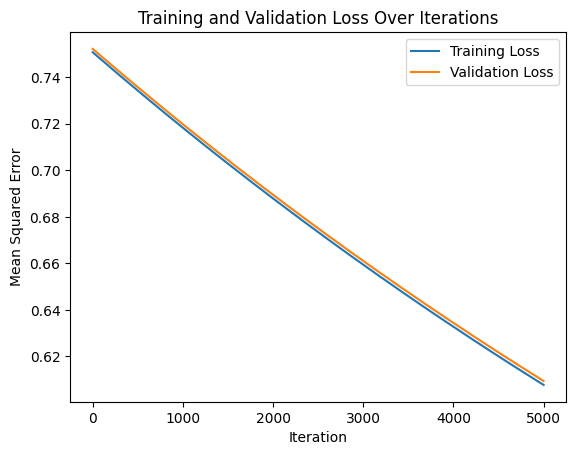

In [4]:
#P2a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
from sklearn.datasets import load_breast_cancer
import time
start_time = time.time()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        t_u_train_device = t_u_train.to(device)
        t_c_train_device = t_c_train.to(device)

        t_p_train = model(t_u_train_device)
        loss_train = loss_fn(t_p_train, t_c_train_device)

        t_u_val_device = t_u_val.to(device)
        t_c_val_device = t_c_val.to(device)

        t_p_val = model(t_u_val_device)
        loss_val = loss_fn(t_p_val, t_c_val_device)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train)
        val_losses.append(loss_val)

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            print(f"Training Time: {time.time()-start_time} seconds")

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

#breast_dataset['label'] = breast_dataset['label'].replace(0, 'Benign')
#breast_dataset['label'] = breast_dataset['label'].replace(1, 'Malignant')

X = breast_dataset.iloc[:, :29].values
Y = breast_dataset.iloc[:, 30].values
X = StandardScaler().fit_transform(X)

Ytarget = pd.DataFrame(Y)

t_c = Y
t_u = X
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u = t_u.to(torch.float32).to(device)
t_c = t_c.to(torch.float32).to(device)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

train_losses = []
val_losses = []

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear1', nn.Linear(29, 32)),
            ('hidden_activation1', nn.Tanh()),
            ('output_linear', nn.Linear(32,1))
]))

seq_model.to(device)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

train_losses_cpu = torch.tensor(train_losses).cpu().numpy()
val_losses_cpu = torch.tensor(val_losses).cpu().numpy()

with torch.no_grad():
  plt.plot(train_losses_cpu, label="Training Loss")
  plt.plot(val_losses_cpu, label="Validation Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.title("Training and Validation Loss Over Iterations")
  plt.show()


Using device: cuda
Epoch 1, Training loss 0.4634, Validation loss 0.4802
Training Time: 0.01779770851135254 seconds


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([456])) that is different to the input size (torch.Size([456, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([113])) that is different to the input size (torch.Size([113, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000, Training loss 0.4470, Validation loss 0.4630
Training Time: 2.564175844192505 seconds
Epoch 2000, Training loss 0.4318, Validation loss 0.4469
Training Time: 4.811355352401733 seconds
Epoch 3000, Training loss 0.4175, Validation loss 0.4320
Training Time: 7.329055309295654 seconds


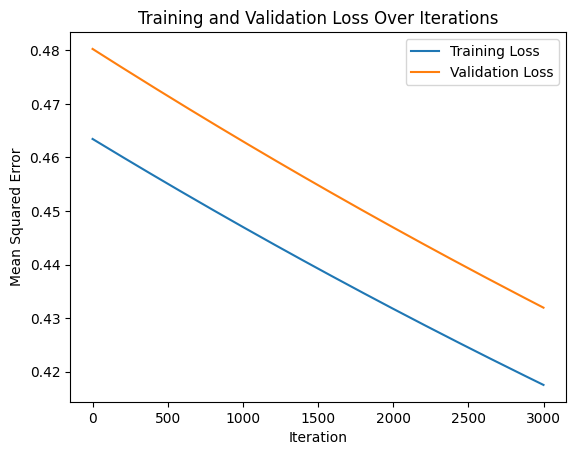

In [6]:
# P2b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
from sklearn.datasets import load_breast_cancer
import time
start_time = time.time()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        t_u_train_device = t_u_train.to(device)
        t_c_train_device = t_c_train.to(device)

        t_p_train = model(t_u_train_device)
        loss_train = loss_fn(t_p_train, t_c_train_device)

        t_u_val_device = t_u_val.to(device)
        t_c_val_device = t_c_val.to(device)

        t_p_val = model(t_u_val_device)
        loss_val = loss_fn(t_p_val, t_c_val_device)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train)
        val_losses.append(loss_val)

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            print(f"Training Time: {time.time()-start_time} seconds")

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

#breast_dataset['label'] = breast_dataset['label'].replace(0, 'Benign')
#breast_dataset['label'] = breast_dataset['label'].replace(1, 'Malignant')

X = breast_dataset.iloc[:, :29].values
Y = breast_dataset.iloc[:, 30].values
X = StandardScaler().fit_transform(X)

Ytarget = pd.DataFrame(Y)

t_c = Y
t_u = X
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u = t_u.to(torch.float32).to(device)
t_c = t_c.to(torch.float32).to(device)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

train_losses = []
val_losses = []

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear1', nn.Linear(29, 32)),
            ('hidden_activation1', nn.Tanh()),
            ('hidden_linear2', nn.Linear(32, 16)),
            ('hidden_activation2', nn.Tanh()),
            ('hidden_linear3', nn.Linear(16, 24)),
            ('hidden_activation3', nn.Tanh()),
            ('output_linear', nn.Linear(24,1))
]))

seq_model.to(device)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

train_losses_cpu = torch.tensor(train_losses).cpu().numpy()
val_losses_cpu = torch.tensor(val_losses).cpu().numpy()

with torch.no_grad():
  plt.plot(train_losses_cpu, label="Training Loss")
  plt.plot(val_losses_cpu, label="Validation Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.title("Training and Validation Loss Over Iterations")
  plt.show()
